Imports

In [1]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
import csv
import itertools
import collections

import pywt
from scipy import stats

%matplotlib inline

Matplotlib Settings

In [2]:
plt.rcParams["figure.figsize"] = (30,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'b'
plt.rcParams['axes.grid'] = True 

In [3]:
import pywt

def denoise(data): 
    w = pywt.Wavelet('sym4')
    maxlev = pywt.dwt_max_level(len(data), w.dec_len)
    threshold = 0.04 # Threshold for filtering

    coeffs = pywt.wavedec(data, 'sym4', level=maxlev)
    for i in range(1, len(coeffs)):
        coeffs[i] = pywt.threshold(coeffs[i], threshold*max(coeffs[i]))
        
    datarec = pywt.waverec(coeffs, 'sym4')
    
    return datarec

In [4]:
data_path  = "/home/ubuntu/Desktop/Projects/SNN/dataset/"
window_size = 180
maximum_counting = 10000

classes = ['N', 'L', 'R', 'A', 'V']
n_classes = len(classes)
count_classes = [0]*n_classes

X = list()
y = list()






In [5]:
records = list()
annotations = list()

for file in os.listdir(data_path):
    if file.endswith(".csv"):
        records.append(data_path+file)
    elif file.endswith(".txt"):
        annotations.append(data_path+file)

In [6]:
records.sort()
annotations.sort()

In [7]:
records[0:5], annotations[0:5]

(['/home/ubuntu/Desktop/Projects/SNN/dataset/100.csv',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/101.csv',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/102.csv',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/103.csv',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/104.csv'],
 ['/home/ubuntu/Desktop/Projects/SNN/dataset/100annotations.txt',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/101annotations.txt',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/102annotations.txt',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/103annotations.txt',
  '/home/ubuntu/Desktop/Projects/SNN/dataset/104annotations.txt'])

Data Extraction and Preprocessing

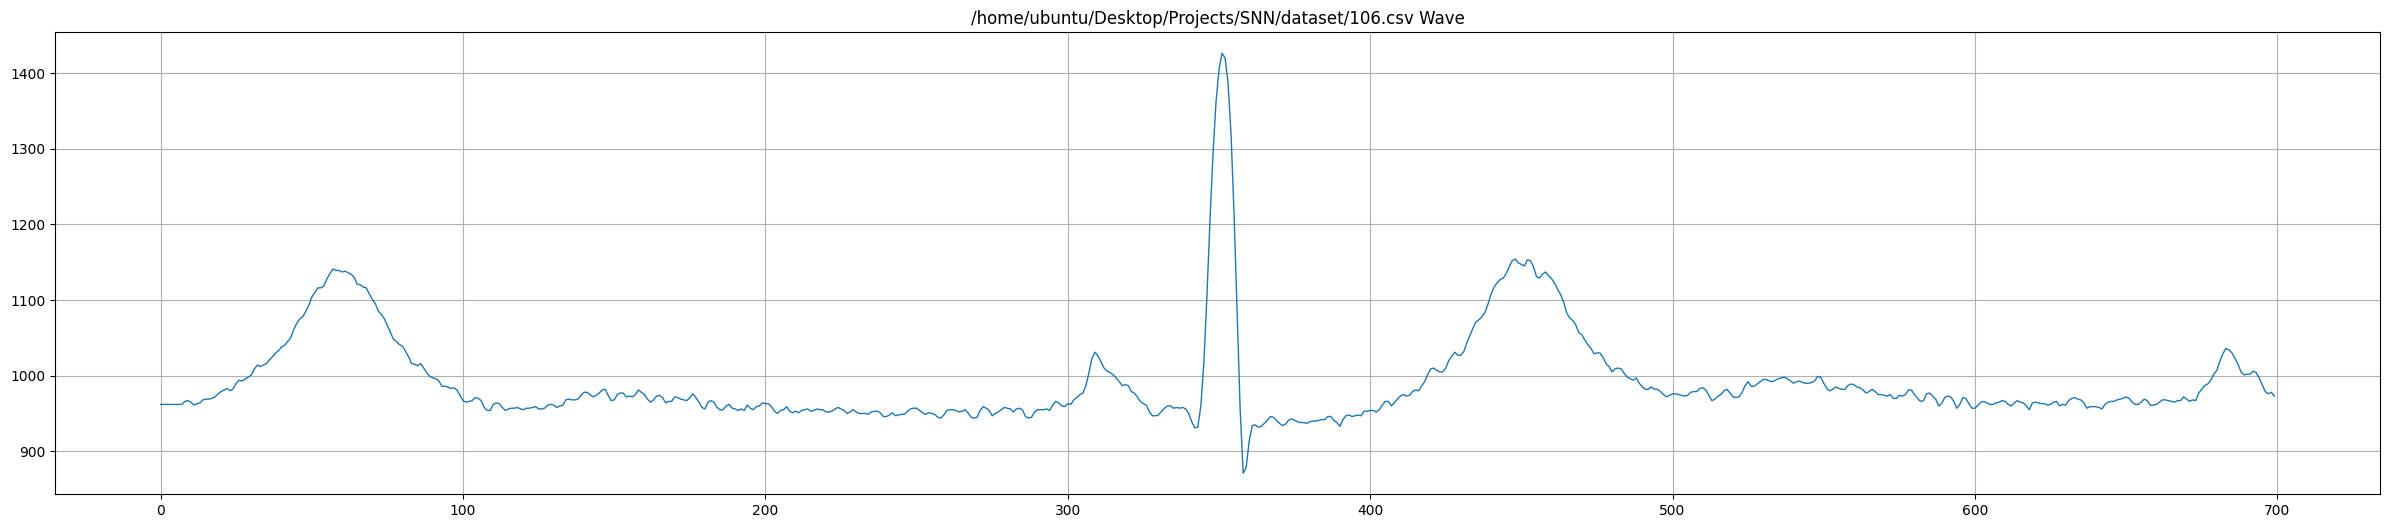

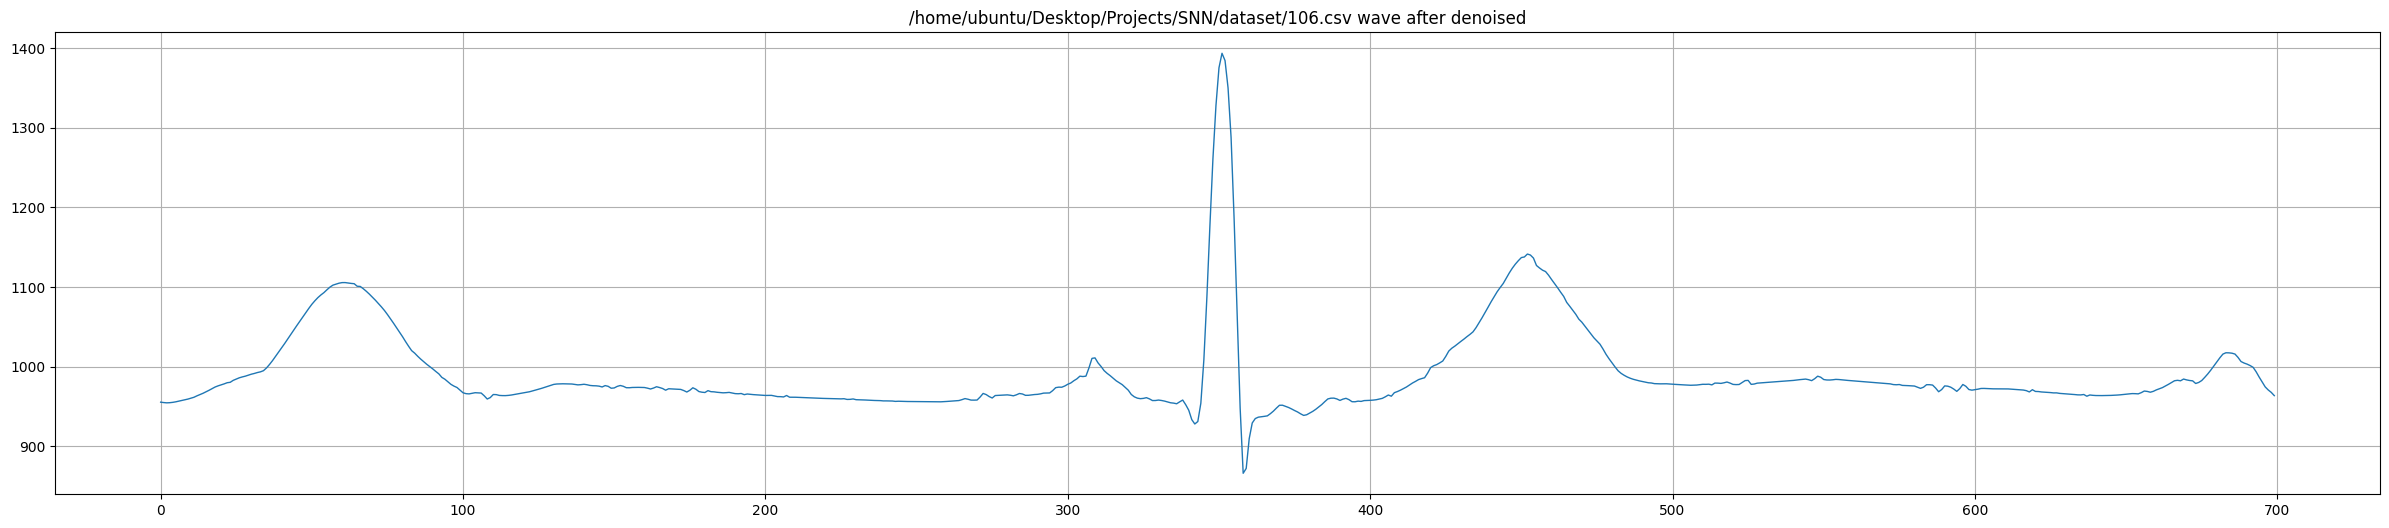

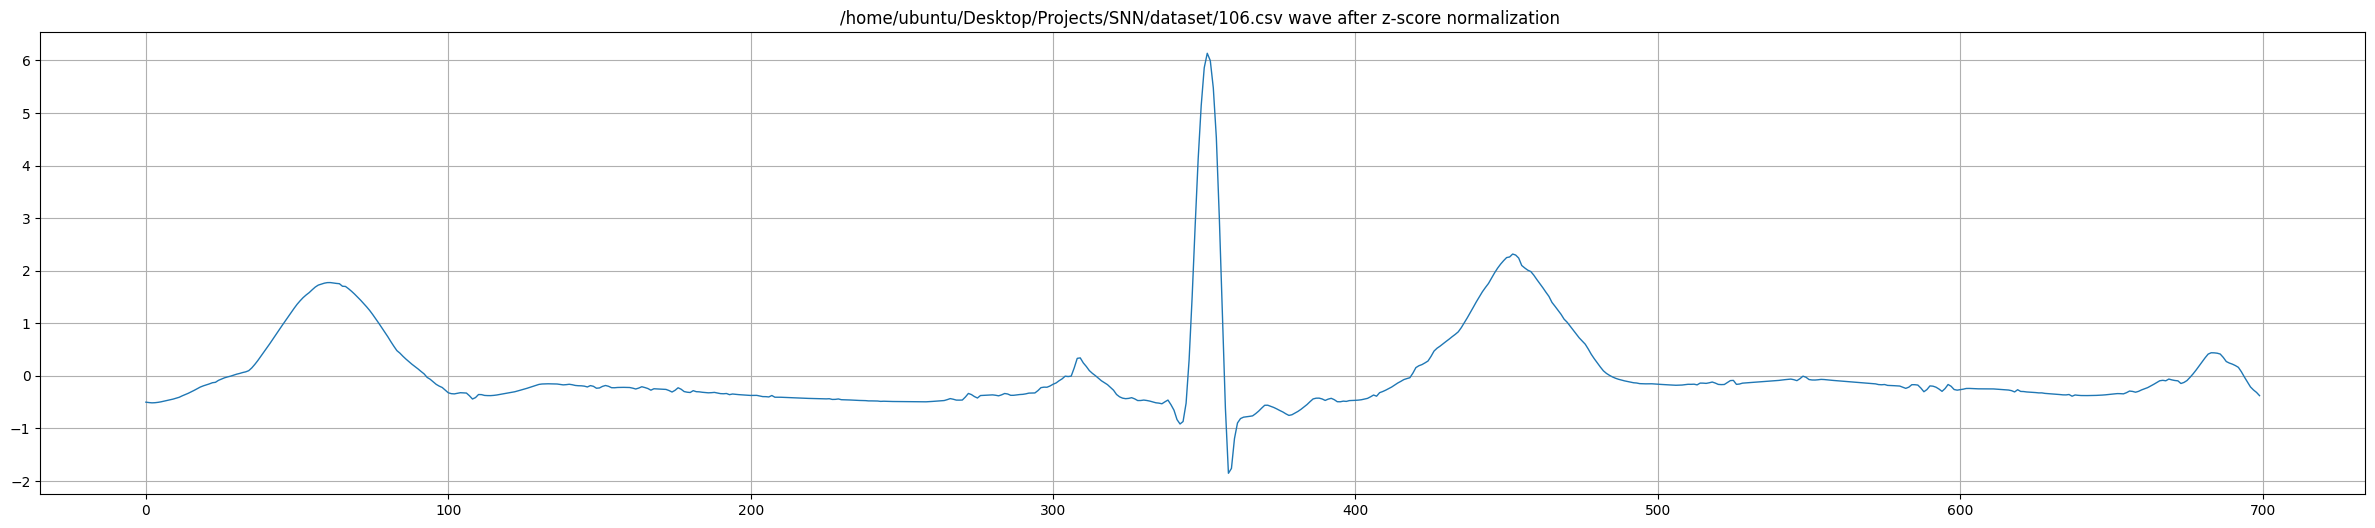

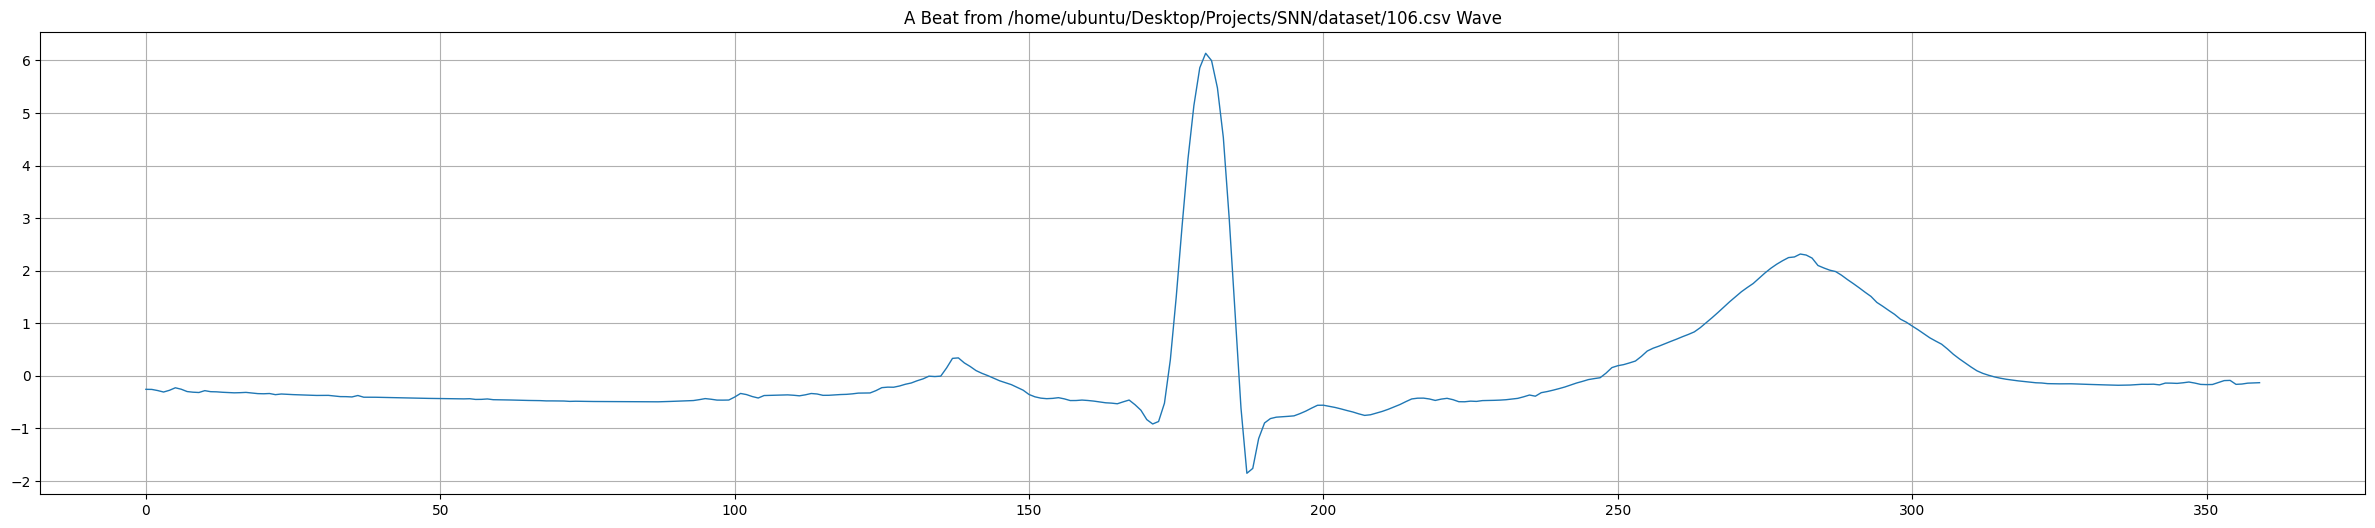

(100012, 360) (100012,)


In [8]:
# Records
for r in range(0,len(records)):
    signals = []

    with open(records[r], 'rt') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|') # read CSV file\
        row_index = -1
        for row in spamreader:
            if(row_index >= 0):
                signals.insert(row_index, int(row[1]))
            row_index += 1
            
    # Plot an example to the signals
    if r == 6:
        # Plot each patient's signal
        plt.title(records[6] + " Wave")
        plt.plot(signals[0:700])
        plt.show()
        
    signals = denoise(signals)
    # Plot an example to the signals
    if r == 6:
        # Plot each patient's signal
        plt.title(records[6] + " wave after denoised")
        plt.plot(signals[0:700])
        plt.show()
        
    signals = stats.zscore(signals)
    # Plot an example to the signals
    if r == 6:
        # Plot each patient's signal
        plt.title(records[6] + " wave after z-score normalization ")
        plt.plot(signals[0:700])
        plt.show()
    
    # Read anotations: R position and Arrhythmia class
    example_beat_printed = False
    with open(annotations[r], 'r') as fileID:
        data = fileID.readlines() 
        beat = list()

        for d in range(1, len(data)): # 0 index is Chart Head
            splitted = data[d].split(' ') #The split() method splits a string into a list.
            splitted = filter(None, splitted)
            next(splitted) # Time... Clipping
            pos = int(next(splitted)) # Sample ID
            arrhythmia_type = next(splitted) # Type
            if(arrhythmia_type in classes):
                arrhythmia_index = classes.index(arrhythmia_type)
           # if count_classes[arrhythmia_index] > maximum_counting: # avoid overfitting
                #    pass
            #else:
                count_classes[arrhythmia_index] += 1
                if(window_size <= pos and pos < (len(signals) - window_size)):
                    beat = signals[pos-window_size:pos+window_size]     ## REPLACE WITH R-PEAK DETECTION
                    # Plot an example to a beat    
                    if r == 6 and not example_beat_printed: 
                        plt.title("A Beat from " + records[6] + " Wave")
                        plt.plot(beat)
                        plt.show()
                        example_beat_printed = True

                    X.append(beat)
                    y.append(arrhythmia_index)

# data shape
print(np.shape(X), np.shape(y))

In [9]:
X[0]



array([ 1.82277749e-02,  2.29534066e-02,  5.84236947e-02,  7.71070433e-02,
        9.50803159e-02,  1.05491969e-01,  1.12324904e-01,  1.16982449e-01,
        1.19702879e-01,  1.22254339e-01,  1.23353659e-01,  1.24874188e-01,
        1.29872322e-01,  1.16599565e-01,  1.30564642e-01,  1.29638792e-01,
        1.29438520e-01,  1.29447168e-01,  1.30554161e-01,  1.28596049e-01,
        1.21310054e-01,  1.37657057e-01,  1.20791471e-01,  1.21240869e-01,
        1.20229090e-01,  1.18182681e-01,  1.15295587e-01,  1.12792517e-01,
        1.10077832e-01,  1.06349733e-01,  1.02141556e-01,  9.81533830e-02,
        9.40987343e-02,  8.94690662e-02,  8.49497706e-02,  8.01874918e-02,
        7.58718673e-02,  7.41195495e-02,  7.35743476e-02,  7.35686031e-02,
        7.42332910e-02,  7.45156129e-02,  7.56970811e-02,  7.69759328e-02,
        7.84617486e-02,  7.95230198e-02,  8.05171182e-02,  8.16047390e-02,
        8.27629669e-02,  8.41188941e-02,  8.57786638e-02,  8.70992498e-02,
        8.77113006e-02,  

In [10]:
len(X)

100012

In [11]:
from collections import Counter



class_counts = Counter(y)

for class_label, ch in class_counts.items():
    print(f"Class {class_label}: {ch} occurrences")


Class 0: 75011 occurrences
Class 3: 2546 occurrences
Class 4: 7129 occurrences
Class 1: 8071 occurrences
Class 2: 7255 occurrences


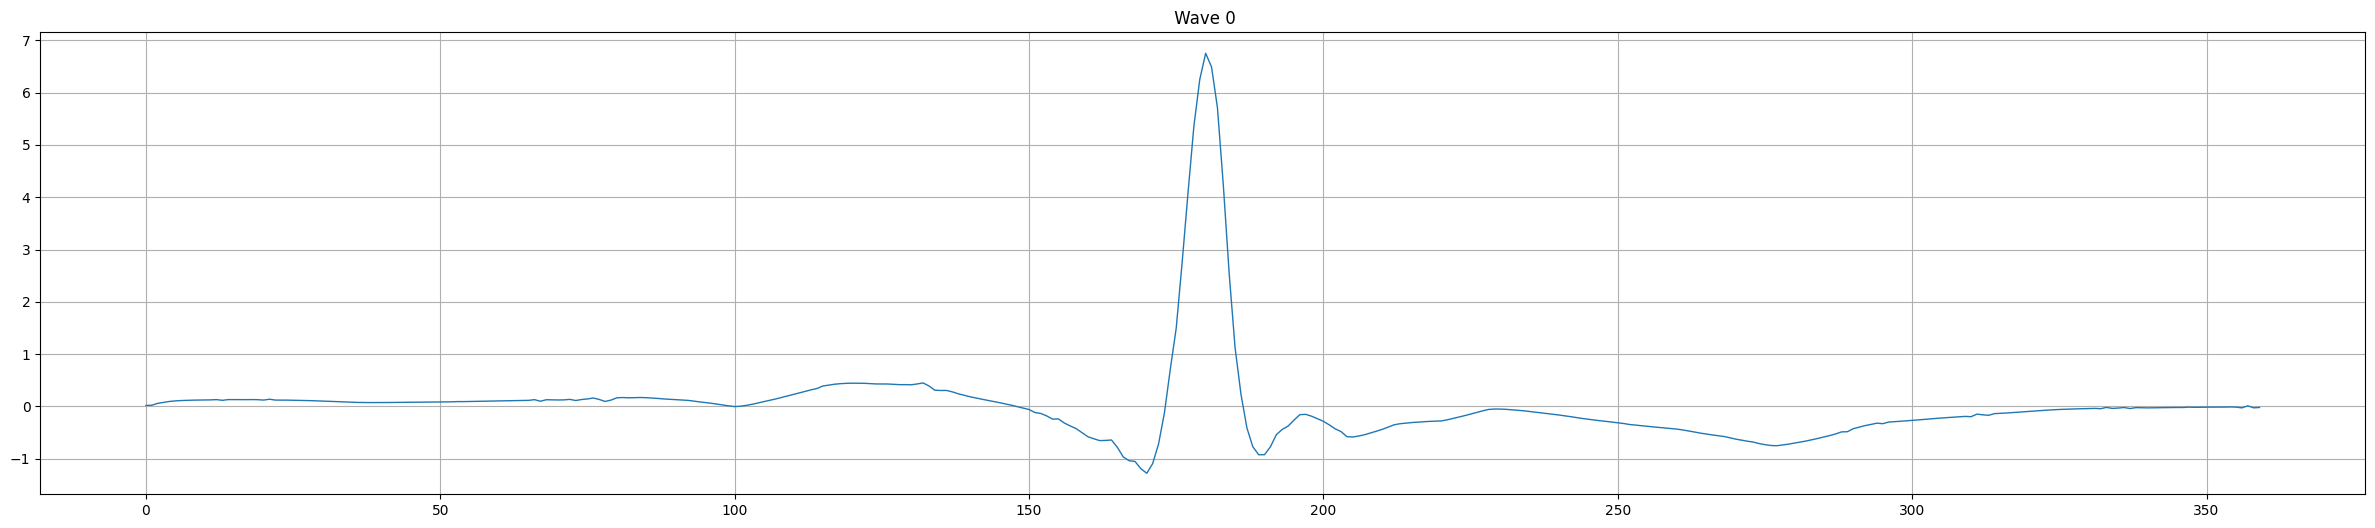

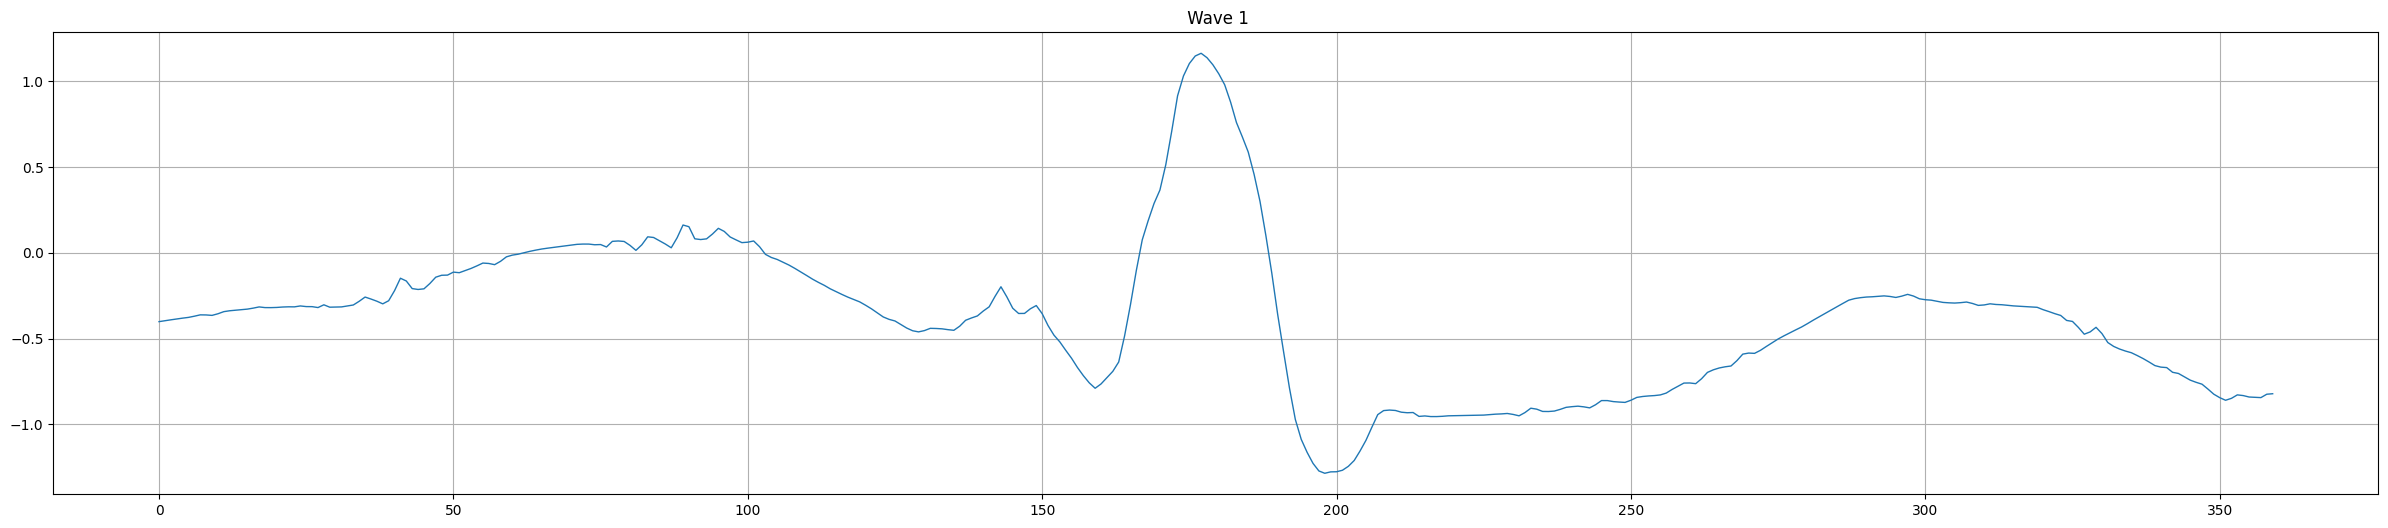

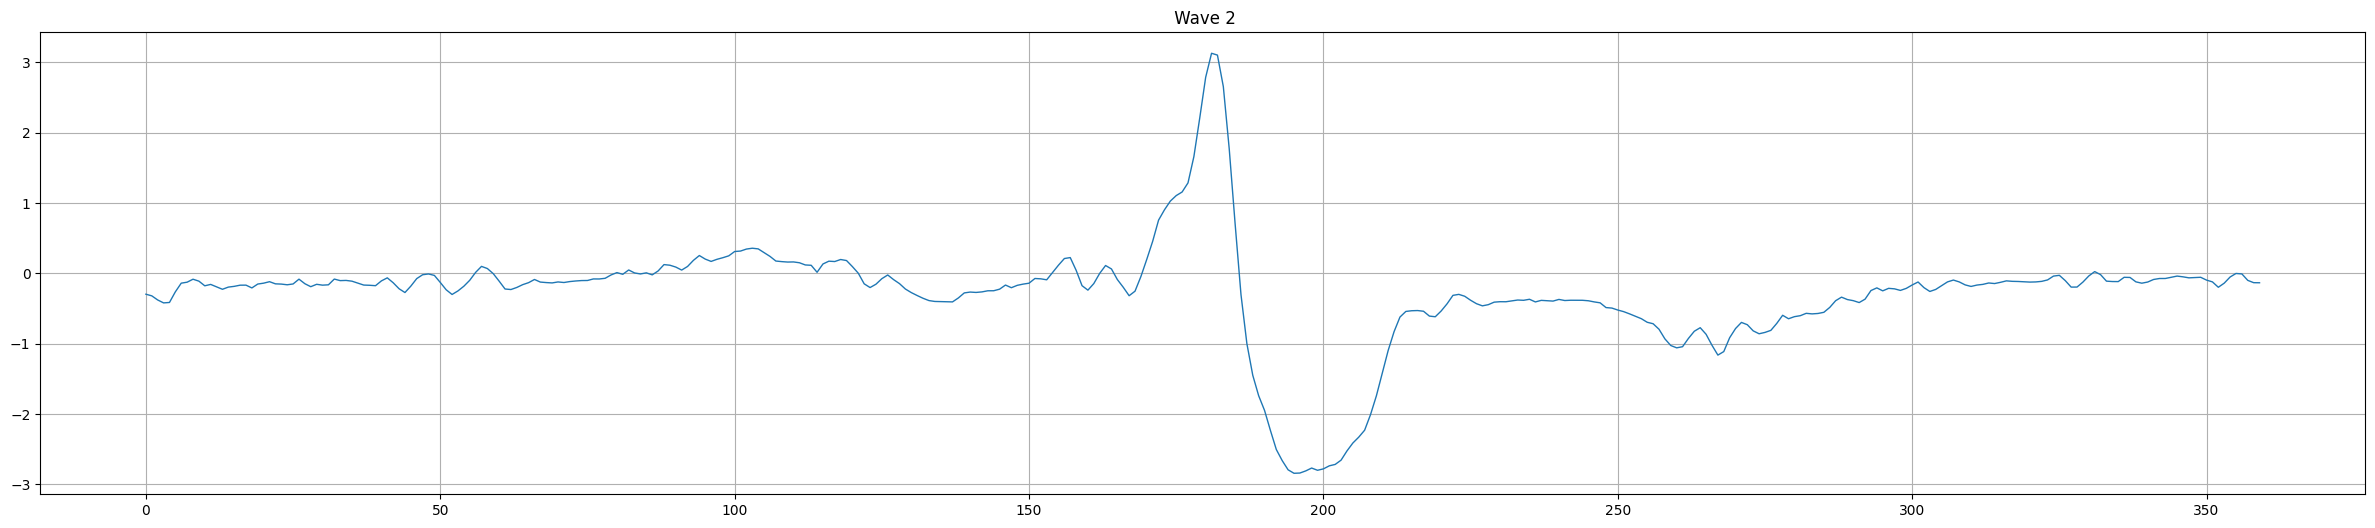

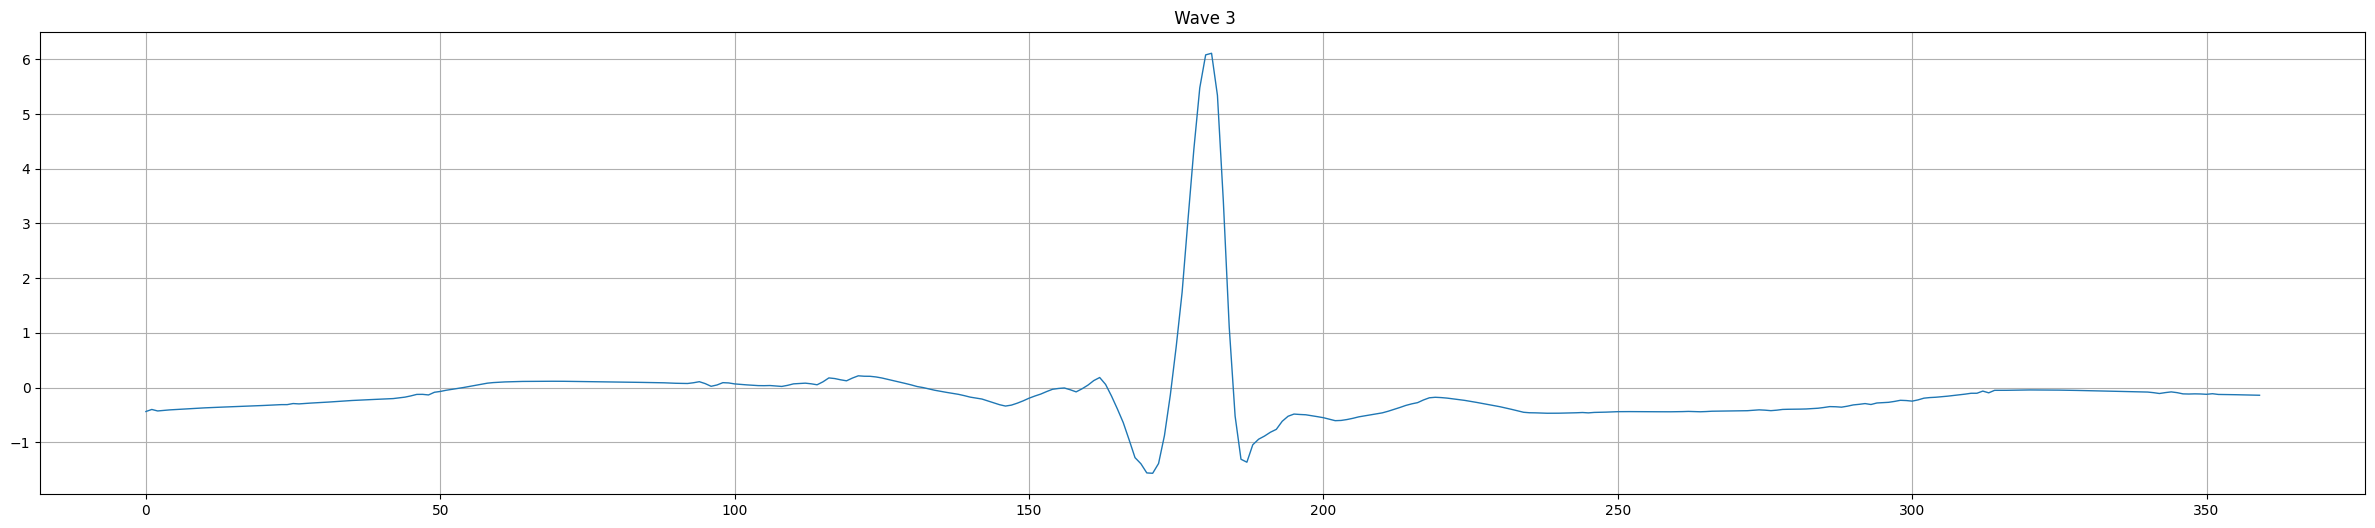

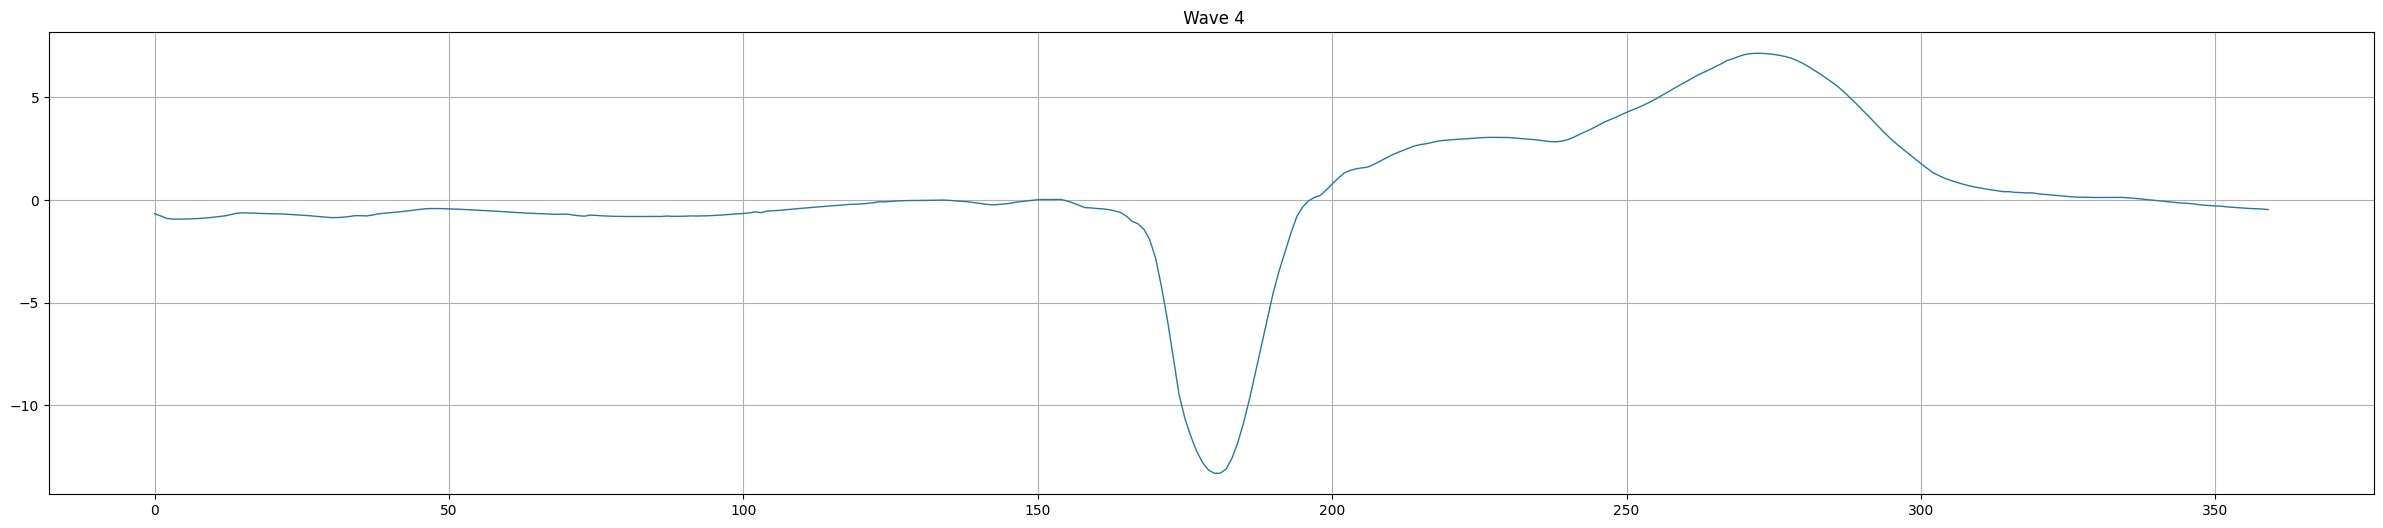

In [14]:


for class_label in range(0,5):
    # Find the first sample in X_train with the current class label
    sample_index = np.argmax(np.array(y) == class_label)

    plt.title(f" Wave {y[sample_index]}")
    plt.plot(X[sample_index])
    plt.show()